# Task 4 - Predicting Insurance Claim Amounts

"""
Goal: Build a linear regression model to predict insurance charges based on customer features such as age, BMI, smoking status, and more.
"""


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Dataset Exploration

In [3]:
# Basic info
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())


(1338, 7)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


# Data Preprocessing

In [5]:
# Encode categorical features (sex, smoker, region)
df_encoded = df.copy()
df_encoded['sex'] = LabelEncoder().fit_transform(df_encoded['sex'])        # male:1, female:0
df_encoded['smoker'] = LabelEncoder().fit_transform(df_encoded['smoker'])  # yes:1, no:0
df_encoded = pd.get_dummies(df_encoded, columns=['region'], drop_first=True)


# Exploratory Data Analysis (EDA)
Correlation Heatmap

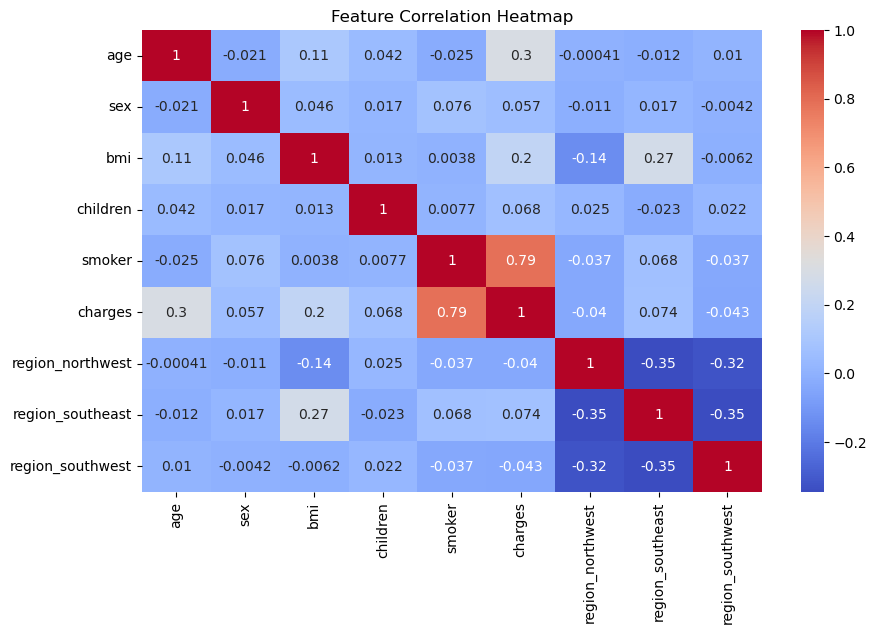

In [6]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


### Scatterplots

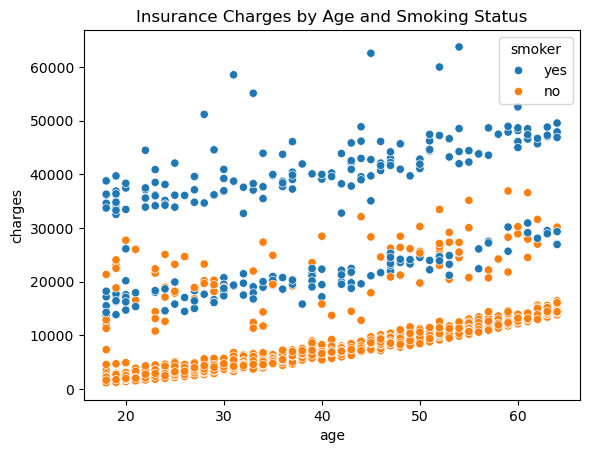

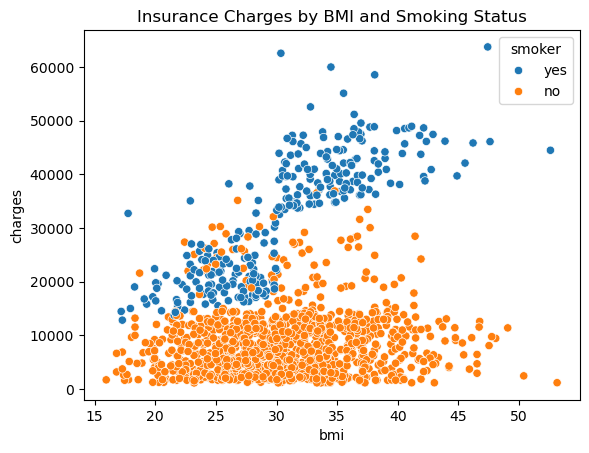

In [7]:
# Charges vs Age
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Insurance Charges by Age and Smoking Status")
plt.show()

# Charges vs BMI
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("Insurance Charges by BMI and Smoking Status")
plt.show()


# Model Training

In [9]:
# Split features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)



# Model Evaluation

In [10]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 4145.450555627585
Root Mean Squared Error (RMSE): 5812.100272258869


# Conclusion

In [11]:
"""
Conclusion:
- Linear Regression is able to model insurance charges with reasonable error.
- Smoking status and BMI are strongly correlated with higher insurance charges.
- Further improvements can be made using polynomial features or advanced models like XGBoost.
"""


'\nConclusion:\n- Linear Regression is able to model insurance charges with reasonable error.\n- Smoking status and BMI are strongly correlated with higher insurance charges.\n- Further improvements can be made using polynomial features or advanced models like XGBoost.\n'